In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install neptune-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install awscli --ignore-installed six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached awscli-1.27.103-py3-none-any.whl (4.0 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached PyYAML-5.4.1-cp39-cp39-manylinux1_x86_64.whl (630 kB)
  Using cached docutils-0.16-py2.py3-none-any.whl (548 kB)
  Using cached botocore-1.29.103-py3-none-any.whl (10.6 MB)
  Using cached s3transfer-0.6.0-py3-none-any.whl (79 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


In [7]:
import neptune.new as neptune

/usr/local/lib/python3.9/dist-packages/neptune/internal/backends/hosted_client.py:50: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version
<ipython-input-7-37c521bab1e7>:1: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  import neptune.new as neptune


In [8]:
run = neptune.init_run(project = "mmk32001/ner-project", api_token ="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MWM4MjBkNy1mYjliLTRjZTQtYmZiMi0zODMxNWQwZTM2M2YifQ==")

<ipython-input-8-14da174bcf50>:1: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(project = "mmk32001/ner-project", api_token ="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MWM4MjBkNy1mYjliLTRjZTQtYmZiMi0zODMxNWQwZTM2M2YifQ==")


https://app.neptune.ai/mmk32001/ner-project/e/NER-61


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PREPROCESSING

In [10]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [11]:
data = pd.read_csv("/content/drive/MyDrive/english_sent.csv")

In [12]:
data

,Unnamed: 0,sentence
0,0,It is the county seat of Alfalfa County.
1,1,Cherokee is a city of Oklahoma in the United S...
2,2,Skateboard decks are normally between 28 and 3...
3,3,The bottom of the deck can be printed with a d...
4,4,The longboard was made by two surfers Ben Wha...
...,...,...
166409,166409,Caffiers is a commune It is found in the regi...
166410,166410,549 people were living in Orange as of 2000.
166411,166411,Orange is a town of Juneau County in the state...
166412,166412,Orainville is a commune It is found in the re...


In [13]:
data.isna().sum()

Unnamed: 0    0
sentence      0
dtype: int64

In [14]:
def replace_spaces(x):
  return x.replace("  "," ")

def replace_fullstop(x):
  return x.replace(" .",".")

def get_pos(x):
  doc = nlp(x)
  li = []
  for x in doc:
    li.append(x.pos_)
  return li


In [15]:
data["sentence"] = data["sentence"].apply(replace_spaces)

data["sentence"] = data["sentence"].apply(replace_fullstop)

df_pos = data["sentence"][:30000].apply(get_pos)         #pos of 30000 sentences

In [16]:
small = data[0:30000]
my_df = pd.concat([small,df_pos],axis=1)
my_df.columns = ["index","sentence","pos"]

my_df

,index,sentence,pos
0,0,It is the county seat of Alfalfa County.,"[PRON, AUX, DET, NOUN, NOUN, ADP, PROPN, PROPN..."
1,1,Cherokee is a city of Oklahoma in the United S...,"[PROPN, AUX, DET, NOUN, ADP, PROPN, ADP, DET, ..."
2,2,Skateboard decks are normally between 28 and 3...,"[ADJ, NOUN, AUX, ADV, ADP, NUM, CCONJ, NUM, NO..."
3,3,The bottom of the deck can be printed with a d...,"[DET, NOUN, ADP, DET, NOUN, AUX, AUX, VERB, AD..."
4,4,The longboard was made by two surfers Ben What...,"[DET, NOUN, AUX, VERB, ADP, NUM, NOUN, PROPN, ..."
...,...,...,...
29995,29995,Marlboro currently sponsors the Ducati MotoGP ...,"[PROPN, ADV, VERB, DET, PROPN, PROPN, ADP, ADP..."
29996,29996,During the 2007 GP2 Series Season ART Grand Pr...,"[ADP, DET, NUM, PROPN, PROPN, PROPN, PROPN, PR..."
29997,29997,In 2006 a Marlborosponsored car won the Indian...,"[ADP, NUM, DET, PROPN, NOUN, VERB, DET, PROPN,..."
29998,29998,Marlboro also sponsored Scuderia Ferrari as se...,"[PROPN, ADV, VERB, PROPN, PROPN, SCONJ, ADJ, N..."


In [17]:
def print_len_sent(x):
  return len(x.split(" "))

def print_len_pos(x):
  return len(x)

m = my_df["sentence"].apply(print_len_sent) 

n = my_df["pos"].apply(print_len_pos)
lis = []
li =[]

unique_pos = []

for i in range(30000):
  #print(m[i], n[i], n[i]-m[i])
  if n[i]-m[i] != 1:
    lis.append(my_df["index"][i])
    li.append(n[i]-m[i])
    
  pos_curr = my_df["pos"][i]
  for i in range(len(pos_curr)):
    if pos_curr[i] not in unique_pos:
      unique_pos.append(pos_curr[i])

print(unique_pos)
print(len(unique_pos))

pos_to_num = {k:v for v,k in enumerate(unique_pos)}
print(pos_to_num)

['PRON', 'AUX', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADJ', 'ADV', 'NUM', 'CCONJ', 'VERB', 'SPACE', 'PART', 'SCONJ', 'X', 'INTJ', 'SYM']
18
{'PRON': 0, 'AUX': 1, 'DET': 2, 'NOUN': 3, 'ADP': 4, 'PROPN': 5, 'PUNCT': 6, 'ADJ': 7, 'ADV': 8, 'NUM': 9, 'CCONJ': 10, 'VERB': 11, 'SPACE': 12, 'PART': 13, 'SCONJ': 14, 'X': 15, 'INTJ': 16, 'SYM': 17}


In [18]:
print(lis)

[31, 33, 34, 51, 59, 108, 386, 390, 395, 399, 479, 575, 608, 660, 854, 931, 1332, 1385, 1393, 1410, 1727, 1740, 1750, 1769, 1783, 1802, 1959, 1960, 1961, 2081, 2375, 2429, 2472, 2597, 2798, 2936, 2978, 2985, 2993, 3138, 3203, 3743, 3793, 4190, 4325, 4339, 4354, 4364, 4404, 4459, 4671, 4737, 4779, 4901, 5115, 5162, 5518, 5646, 5658, 5820, 6006, 6704, 6737, 6806, 6840, 6867, 7240, 7387, 7427, 8265, 8464, 8491, 8552, 8554, 8555, 8556, 8568, 8824, 8825, 8828, 8829, 8830, 8965, 9018, 9110, 9209, 9339, 9850, 9943, 10012, 10017, 10426, 10463, 10543, 10581, 10705, 10726, 11519, 11619, 11797, 11802, 11870, 12120, 12220, 13105, 13126, 13157, 13400, 13709, 13733, 13869, 13918, 14003, 14205, 14339, 14430, 14541, 14656, 14770, 14891, 15020, 15072, 15073, 15083, 15296, 15388, 15593, 15602, 15947, 15956, 16062, 16068, 16070, 16166, 16288, 16313, 16341, 16866, 16972, 17021, 17040, 17178, 17216, 17666, 17926, 17963, 18231, 18302, 18610, 18725, 19169, 19268, 19556, 19920, 19960, 20031, 20047, 20111, 201

In [19]:
for i in range(len(lis)):
  index_name = my_df[my_df['index'] == lis[i] ].index
  my_df.drop(index_name, inplace = True)   # inplace false means it will return a copy of our dataframe(means the index will get arranged again from 0 in sequence)

my_df.reset_index(inplace = True)

In [20]:
my_df = my_df.drop(["index"], axis=1)
my_df

,level_0,sentence,pos
0,0,It is the county seat of Alfalfa County.,"[PRON, AUX, DET, NOUN, NOUN, ADP, PROPN, PROPN..."
1,1,Cherokee is a city of Oklahoma in the United S...,"[PROPN, AUX, DET, NOUN, ADP, PROPN, ADP, DET, ..."
2,2,Skateboard decks are normally between 28 and 3...,"[ADJ, NOUN, AUX, ADV, ADP, NUM, CCONJ, NUM, NO..."
3,3,The bottom of the deck can be printed with a d...,"[DET, NOUN, ADP, DET, NOUN, AUX, AUX, VERB, AD..."
4,4,The longboard was made by two surfers Ben What...,"[DET, NOUN, AUX, VERB, ADP, NUM, NOUN, PROPN, ..."
...,...,...,...
29747,29995,Marlboro currently sponsors the Ducati MotoGP ...,"[PROPN, ADV, VERB, DET, PROPN, PROPN, ADP, ADP..."
29748,29996,During the 2007 GP2 Series Season ART Grand Pr...,"[ADP, DET, NUM, PROPN, PROPN, PROPN, PROPN, PR..."
29749,29997,In 2006 a Marlborosponsored car won the Indian...,"[ADP, NUM, DET, PROPN, NOUN, VERB, DET, PROPN,..."
29750,29998,Marlboro also sponsored Scuderia Ferrari as se...,"[PROPN, ADV, VERB, PROPN, PROPN, SCONJ, ADJ, N..."


In [21]:
my_df["pos"]

0        [PRON, AUX, DET, NOUN, NOUN, ADP, PROPN, PROPN...
1        [PROPN, AUX, DET, NOUN, ADP, PROPN, ADP, DET, ...
2        [ADJ, NOUN, AUX, ADV, ADP, NUM, CCONJ, NUM, NO...
3        [DET, NOUN, ADP, DET, NOUN, AUX, AUX, VERB, AD...
4        [DET, NOUN, AUX, VERB, ADP, NUM, NOUN, PROPN, ...
                               ...                        
29747    [PROPN, ADV, VERB, DET, PROPN, PROPN, ADP, ADP...
29748    [ADP, DET, NUM, PROPN, PROPN, PROPN, PROPN, PR...
29749    [ADP, NUM, DET, PROPN, NOUN, VERB, DET, PROPN,...
29750    [PROPN, ADV, VERB, PROPN, PROPN, SCONJ, ADJ, N...
29751    [ADP, NOUN, ADJ, NOUN, NOUN, ADP, PROPN, PROPN...
Name: pos, Length: 29752, dtype: object

In [22]:

for i in range(29752):
  m = []
  for j in range(len(my_df["pos"][i])):
    cur = my_df["pos"][i][j]
    m.append(pos_to_num[cur])

  my_df["pos"][i] = m

<ipython-input-22-059d31a6344c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["pos"][i] = m


In [23]:
my_df

,level_0,sentence,pos
0,0,It is the county seat of Alfalfa County.,"[0, 1, 2, 3, 3, 4, 5, 5, 6]"
1,1,Cherokee is a city of Oklahoma in the United S...,"[5, 1, 2, 3, 4, 5, 4, 2, 5, 5, 6]"
2,2,Skateboard decks are normally between 28 and 3...,"[7, 3, 1, 8, 4, 9, 10, 9, 3, 8, 6]"
3,3,The bottom of the deck can be printed with a d...,"[2, 3, 4, 2, 3, 1, 1, 11, 4, 2, 3, 4, 2, 3, 10..."
4,4,The longboard was made by two surfers Ben What...,"[2, 3, 1, 11, 4, 9, 3, 5, 5, 10, 5, 5, 6]"
...,...,...,...
29747,29995,Marlboro currently sponsors the Ducati MotoGP ...,"[5, 8, 11, 2, 5, 5, 4, 4, 2, 9, 5, 5, 3, 3, 3,..."
29748,29996,During the 2007 GP2 Series Season ART Grand Pr...,"[4, 2, 9, 5, 5, 5, 5, 5, 5, 1, 8, 11, 4, 5, 6]"
29749,29997,In 2006 a Marlborosponsored car won the Indian...,"[4, 9, 2, 5, 3, 11, 2, 5, 9, 6]"
29750,29998,Marlboro also sponsored Scuderia Ferrari as se...,"[5, 8, 11, 5, 5, 14, 7, 3, 11, 4, 9, 5, 3, 3, ..."


In [24]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased",truncation=True, padding=True)

t = tokenizer(my_df["sentence"][0])

tokenized_data = tokenizer.tokenize(my_df["sentence"][0])
tokenized_data

['It',
 'is',
 'the',
 'county',
 'seat',
 'of',
 'Alfa',
 '##lf',
 '##a',
 'County',
 '.']

In [25]:
def get_correct_labels(example):
  labels_all = []
  tokenized_info = []

  for i in range(len(example)):
    tokenized_data = tokenizer(example["sentence"][i])   #1 sentence is tokenized

    y = {"input_ids":[], "token_type_ids":[], "attention_mask":[]}     # for every sentence
    y["input_ids"] = tokenized_data["input_ids"]
    y["token_type_ids"] = tokenized_data["token_type_ids"]
    y["attention_mask"] = tokenized_data["attention_mask"]

    tokenized_info.append(y)

    actual_label = example["pos"][i]   # ground truth for 1 sentence
    word_ids = tokenized_data.word_ids()
    prev_id = None
    new_label = []
    
    print(i)
    for word_idx in word_ids:

      if word_idx== None:
        new_label.append(-100)

      elif word_idx != prev_id:
        new_label.append(actual_label[word_idx])
      
      else:
        new_label.append(actual_label[word_idx])
      
      prev_id = word_idx

    tokenized_info[i]["labels"] = new_label
    labels_all.append(new_label)

    
  return tokenized_info


In [26]:
data_try = get_correct_labels(my_df)  

Streaming output truncated to the last 5000 lines.
24752
24753
24754
24755
24756
24757
24758
24759
24760
24761
24762
24763
24764
24765
24766
24767
24768
24769
24770
24771
24772
24773
24774
24775
24776
24777
24778
24779
24780
24781
24782
24783
24784
24785
24786
24787
24788
24789
24790
24791
24792
24793
24794
24795
24796
24797
24798
24799
24800
24801
24802
24803
24804
24805
24806
24807
24808
24809
24810
24811
24812
24813
24814
24815
24816
24817
24818
24819
24820
24821
24822
24823
24824
24825
24826
24827
24828
24829
24830
24831
24832
24833
24834
24835
24836
24837
24838
24839
24840
24841
24842
24843
24844
24845
24846
24847
24848
24849
24850
24851
24852
24853
24854
24855
24856
24857
24858
24859
24860
24861
24862
24863
24864
24865
24866
24867
24868
24869
24870
24871
24872
24873
24874
24875
24876
24877
24878
24879
24880
24881
24882
24883
24884
24885
24886
24887
24888
24889
24890
24891
24892
24893
24894
24895
24896
24897
24898
24899
24900
24901
24902
24903
24904
24905
24906
24907
24908
24909
2

In [27]:
t = tokenizer.tokenize("I am going to Jammu-Kashmir")
print(t)
ti = tokenizer("I am going to Jammu-Kashmir")
print(ti.word_ids())

d = nlp("I am going to Jammu-Kashmir")
for t in d:
  print(t.text,t.pos_)

['I', 'am', 'going', 'to', 'Jammu', '-', 'Kashmir']
[None, 0, 1, 2, 3, 4, 5, 6, None]
I PRON
am AUX
going VERB
to ADP
Jammu PROPN
- PUNCT
Kashmir PROPN


MODEL


In [28]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

df = pd.DataFrame(data_try)

#train_df, val_df = train_test_split(df, train_size=0.8)
train_df = df[:10000]
val_df = df[10000:]

my_dataset = DatasetDict({
     "train":Dataset.from_pandas(train_df),
     "eval": Dataset.from_pandas(val_df)
 })

In [29]:
my_dataset = my_dataset.remove_columns(["token_type_ids"])

In [30]:
from torch.utils.data import DataLoader
from transformers import DataCollatorForTokenClassification
import evaluate
import numpy as np

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer, padding=True, return_tensors='pt')

train_dataset = my_dataset["train"].shuffle(seed=42)
eval_dataset = my_dataset["eval"].shuffle(seed=42)

train_dataloader = DataLoader(train_dataset, shuffle = True, batch_size=16, collate_fn=data_collator)
eval_dataloader = DataLoader(eval_dataset, batch_size=16,collate_fn=data_collator)

In [31]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.cuda.empty_cache()
device

device(type='cuda')

In [32]:
from transformers import AutoModelForTokenClassification
from torch.optim import AdamW

num_epochs = 5

model = AutoModelForTokenClassification.from_pretrained("bert-base-cased", num_labels=18)
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=0.00001)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [33]:
model

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [34]:
for epoch in range(num_epochs):
  j=0
  total_train_loss = 0.0
  total_eval_loss = 0.0
  print(f"Epoch : {epoch+1}")
  model.train()
  for batch in train_dataloader:
    
    batch = {k: v.to(device) for k,v in batch.items()}  #this will form dictionary like structure.Here k is "labels","input_ids","attention_masks"
 
    outputs = model(**batch)
    loss = outputs.loss
    print("Batch ",j,": ",loss)
    total_train_loss+=loss
    run["training/batch_train_loss"].log(loss)
    

    
    loss.backward()  #compute gradient of the weights with respect to loss
    optimizer.step()  # optimize means update the weights of the network based on computed gradients
   
    optimizer.zero_grad()
    j=j+1

    # model.eval()
    # with torch.no_grad():
    #   for batch in eval_dataloader:
    #     batch = {k: v.to(device) for k,v in batch.items()}
    #     outputs = model(**batch)
    #     loss = outputs.loss
    #     run["training/batch_val_loss"].log(loss)
    #     total_eval_loss += loss

  print(f"TRAIN LOSS: "+ str(total_train_loss/len(train_dataloader)))
  #print(f"VALI LOSS: "+ str(total_eval_loss/len(eval_dataloader)))

  run["training/epoch_train_loss"].log(total_train_loss/len(train_dataloader))
  #run["training/epoch_val_loss"].log(total_eval_loss/len(eval_dataloader))


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch : 1
Batch  0 :  tensor(2.9611, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  1 :  tensor(2.9378, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  2 :  tensor(2.8915, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  3 :  tensor(2.8863, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  4 :  tensor(2.8191, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  5 :  tensor(2.7752, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  6 :  tensor(2.7696, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  7 :  tensor(2.6664, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  8 :  tensor(2.7190, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  9 :  tensor(2.5754, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  10 :  tensor(2.5906, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  11 :  tensor(2.5505, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  12 :  tensor(2.5159, device='cuda:0', grad_fn=<NllLossBackward0>)
Batch  13 :  tensor(2.4548, device='cuda:0', grad_f

In [35]:
  model_save_name = 'pos_model.pt'
  path = F"/content/drive/My Drive/{model_save_name}" 
  torch.save(model.state_dict(), path)

In [36]:
import torch

def accuracy_fun3(actual_label, predicted_label):
  correct=0
  total=0

  for i in range(actual_label.shape[0]):
    actual_new = []
    predicted_new = []
    for j in range(actual_label.shape[1]):
      
      if actual_label[i][j]!=-100:
        actual_new.append(actual_label[i][j])
        predicted_new.append(predicted_label[i][j])
    
    actual_new_ten = torch.stack(actual_new, dim=0)  # 1d tensor for single sentence
    predicted_new_ten = torch.stack(predicted_new, dim=0)
    #print(actual_new_ten.shape[0])
    for k in range(actual_new_ten.shape[0]):
      if actual_new_ten[k] == predicted_new_ten[k]:
        correct+=1
      total+=1

  return correct, total


def remove_padding(actual_label,predicted_label):
  act= torch.Tensor()
  pred=torch.Tensor()
  act = act.to(device)
  pred = pred.to(device)
  for i in range(actual_label.shape[0]):
  
    actual_new = []
    predicted_new = []
    actual_new_ten = torch.Tensor()
    predicted_new_ten = torch.Tensor()
    actual_new_ten = actual_new_ten.to(device)
    
    predicted_new_ten = predicted_new_ten.to(device)
    for j in range(actual_label.shape[1]):
    

      if actual_label[i][j]!=-100:
        actual_new.append(actual_label[i][j])
        predicted_new.append(predicted_label[i][j])


    actual_new_ten = torch.stack(actual_new, dim=0)   # 1d tensor for a single sentence
    predicted_new_ten = torch.stack(predicted_new, dim=0)
    

    act = torch.cat((act,actual_new_ten), dim=0)  # 1d tensor for entire batch
    pred = torch.cat((pred, predicted_new_ten), dim=0)  # 1d tensor for entire batch

  return act, pred



TESTING

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np

model.eval()
sum=0.0
sum2=0.0

i=0
recent_correct=0
recent_total=0

act= torch.Tensor()
pred=torch.Tensor()

act = act.to(device)
pred = pred.to(device)
for batch in eval_dataloader:
  batch = {k: v.to(device) for k,v in batch.items()}
  with torch.no_grad():
    outputs = model(**batch)     # no gradient calculation
  
  loss = outputs.loss
  logits = outputs.logits
  predictions = torch.argmax(logits, dim=-1)      # argmax is applied along last dimension
  
  predictions.to(device)
  
  correct, total = accuracy_fun3(batch["labels"], predictions)  #correct and total for batch
  recent_correct+=correct
  recent_total+=total

  ground_truth, predic = remove_padding(batch["labels"], predictions) 
  act = torch.cat((act,ground_truth), dim=0)  # 1d tensor for entire dataloader
  pred = torch.cat((pred, predic), dim=0)  # 1d tensor for entire dataloader


act = act.detach().cpu().numpy()
pred = pred.detach().cpu().numpy()

cm = confusion_matrix(act, pred,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
print(type(cm))
print(cm)


acc3 = recent_correct/recent_total
  
print("Validation Accuracy 3: " + str(acc3))

<class 'numpy.ndarray'>
[[ 15618    146    102    142     56    109     26     48     55     12
      76    215      4     21     52      7      0      0]
 [    58  21355    108     54     44     78      3     45     70      8
       8    286      0     67     14      0      0      0]
 [    49     19  42649    627    103    323      7    306     25     17
      41     55      5      3      8      8      0      0]
 [   114    136    128  83785    535   4762    267   1756    126    195
     186    888      2     67     46     17      0      0]
 [    94     17    438    344  50570    596     22    132    159     90
      18     91      1     50     93     42      0      0]
 [   108    121    117   3342    202 121700    173   1192     83    326
     143    312      2    134     21    105      0      0]
 [     1      0      0     21      0    128  19057      2      0      6
       0      0      0      0      0      0      0      0]
 [    15     15     26   2085     85   1362     33  27315  

In [ ]:
run["validation/accuracy"] = acc3

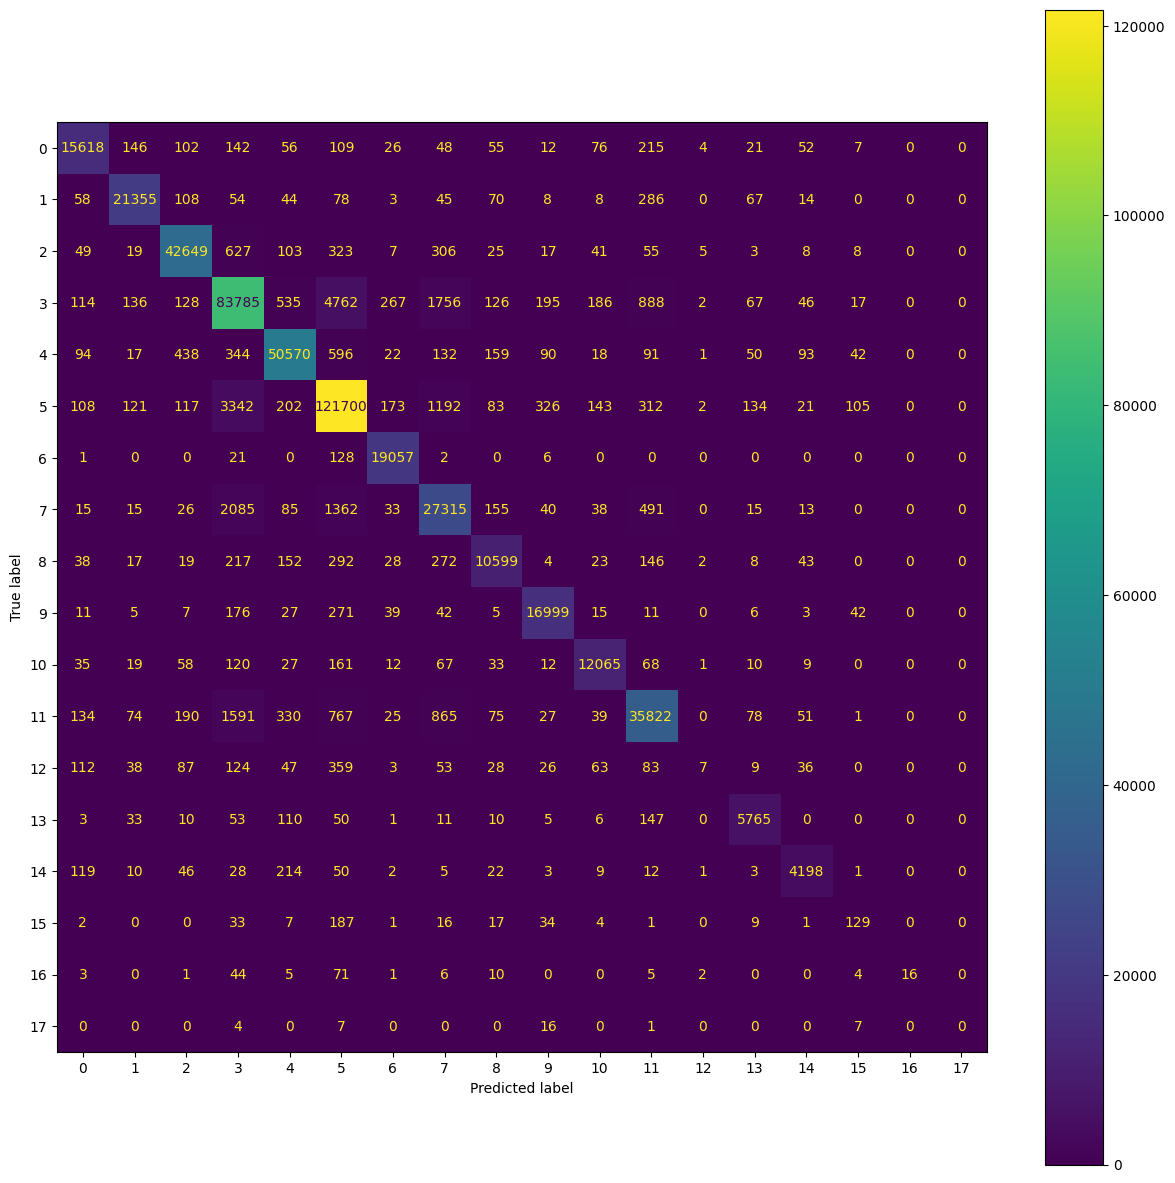

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)


In [40]:
run["validation/cm"].upload(fig)